# Homework 2

# Classical Mechanics

# José Pablo Cuevas Cázares


In [1]:
import Lagrangian_Mechanics as LM
import sympy as sp
from IPython.display import display,Math,Latex

In [2]:
# General parameters
t=LM.time();
m=LM.mass(0);

# Problem 2

In [3]:
# Generalized coordinates
q2=LM.cartesian()[0];

In [4]:
# Problem 2 parameter
k=sp.Symbol("k",positive=True);

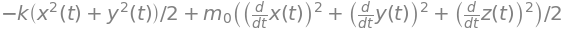

In [82]:
# Lagrangian 
L2=m/2*(sp.diff(q2[0],t)**2+sp.diff(q2[1],t)**2+sp.diff(q2[2],t)**2)-k/2*(q2[0]**2+q2[1]**2);
L2

# a)

In [6]:
# Equations of motion
EOM2=LM.EOM(L2,q2,[],[]);
EOM2x=sp.Eq(EOM2[0],0);
EOM2y=sp.Eq(EOM2[1],0);
EOM2z=sp.Eq(EOM2[2],0);

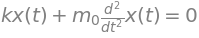

In [7]:
EOM2x

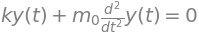

In [8]:
EOM2y

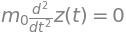

In [9]:
EOM2z

# b)

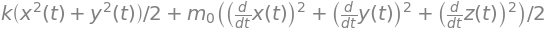

In [10]:
# Energy function of the system
E2=LM.Energy(L2,q2);
E2

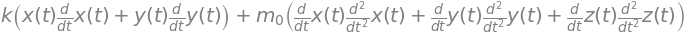

In [11]:
# Total temporal derivative of the energy function
dE2dt=sp.simplify(sp.diff(E2,t));
dE2dt

In [12]:
# Taking into account the EOM yields
sp.simplify(dE2dt.subs([(sp.diff(sp.diff(q2[2],t)),0),(sp.diff(sp.diff(q2[0],t)),-k/m*q2[0]),(sp.diff(sp.diff(q2[1],t)),-k/m*q2[1])]))

In [13]:
# So the energy for the system is conserved

# c)

In [14]:
# Momentum array
P2=LM.gen_p(L2,q2);

p2x=P2[0];
p2y=P2[1];
p2z=P2[2];

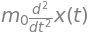

In [15]:
# Momentum is conserved if dp_i/dt=0
sp.diff(p2x,t)

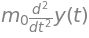

In [16]:
sp.diff(p2y,t)

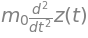

In [17]:
sp.diff(p2z,t)

In [18]:
# Using the EOM, clearly p_z is the only conserved component of momentum

# d) 
The angular momentum of a system is defined as 

$\vec{M}=\sum_{a}\vec{x}_a\times\vec{p}_a$

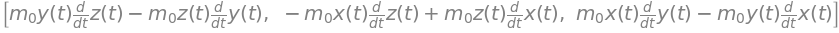

In [19]:
# Angular momentum using q=x as the cartesian position vector 
M2=LM.cross(q2,P2);
M2

In [20]:
# Checking which components of the angular momentum are conserved
dM2xdt=sp.diff(M2[0],t);
dM2ydt=sp.diff(M2[1],t);
dM2zdt=sp.diff(M2[2],t);

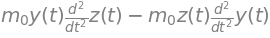

In [21]:
dM2xdt

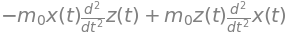

In [22]:
dM2ydt

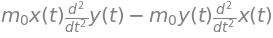

In [23]:
dM2zdt

In [24]:
# Using the EOM yields 

# For M_x
dM2xdt.subs([(sp.diff(sp.diff(q2[2],t)),0),(sp.diff(sp.diff(q2[1],t)),-k/m*q2[1])])

In [25]:
# For M_y
dM2ydt.subs([(sp.diff(sp.diff(q2[2],t)),0),(sp.diff(sp.diff(q2[0],t)),-k/m*q2[0])])

In [26]:
# For M_z
dM2zdt.subs([(sp.diff(sp.diff(q2[0],t)),-k/m*q2[0]),(sp.diff(sp.diff(q2[1],t)),-k/m*q2[1])])

In [27]:
# Therefore, only M_z is conserved

# Problem 3

# a)

In [28]:
# Parameters 
m1=LM.mass(1);
m2=LM.mass(2);
omega,a=sp.symbols("Omega,a");
g=LM.grav();

In [29]:
# Generalized coordinates 
q3=LM.spherical()[0];
r=q3[0];
theta=q3[1];
phi=q3[2];

In [30]:
# There are three masses on the problem. Puting the origin at the point A yields 

# Position vectors 
x3_1=[r*sp.sin(theta)*sp.cos(phi),r*sp.sin(theta)*sp.sin(phi),-r*sp.cos(theta)]; 
x3_2=[-r*sp.sin(theta)*sp.cos(phi),-r*sp.sin(theta)*sp.sin(phi),-r*sp.cos(theta)];
x3_3=[0,0,-2*r*sp.cos(theta)];

# External force field (one array for the two particles with mass m1 and one for the particle with mass m2)
F3_1=[0,0,-m1*g];
F3_2=[0,0,-m2*g];

# The moment of inertia por a point particle is I=M*r^2. Two variables, I1 and I2 will be created, the first one for the 
# two m1 point masses and the second one for the m2 point mass. r is the particle's distance from the axis of rotation

#I1=m1*(r*sp.sin(theta))**2; # NOTE: one must not consider the moment of inertia of the particles because it over-specifices the system
I2=0;

# System array for the first particle
system1_1=[x3_1,1,F3_1,0,0,0];

# System array for the second particle
system1_2=[x3_2,1,F3_1,0,0,0];

# System array for the third particle
system1_3=[x3_3,2,F3_2,0,I2,0];

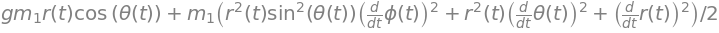

In [31]:
# Lagrangian for the first particle
L3_1=LM.L(system1_1);
L3_1

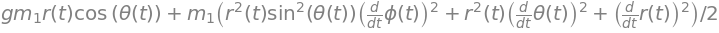

In [32]:
# Lagrangian for the second particle
L3_2=LM.L(system1_2);
L3_2

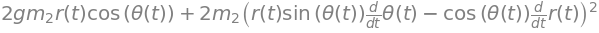

In [33]:
# Lagrangian for the third particle
L3_3=LM.L(system1_3);
L3_3

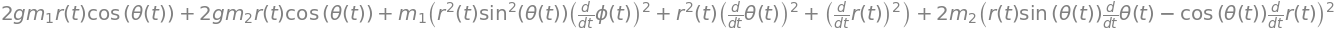

In [34]:
# The complete Lagrangian of the system is 
L3=L3_1+L3_2+L3_3;
L3

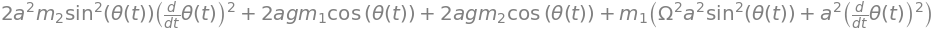

In [35]:
# Substituting the constant angular velocity, omega, and the constant radius a yields
L3=L3.subs([(sp.diff(phi,t),omega),(r,a)]);
L3=L3.simplify();
L3

# b)

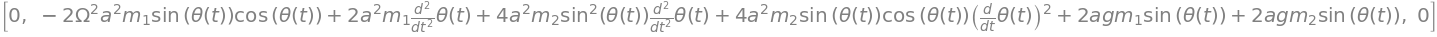

In [36]:
# Equations of motion
EOM3=LM.EOM(L3,q3,[],[]);
EOM3

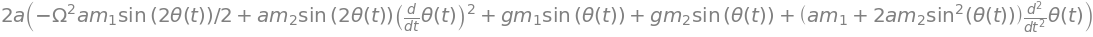

In [37]:
EOM3theta=sp.simplify(EOM3[1]);
EOM3theta=sp.collect(EOM3theta,sp.diff(sp.diff(theta,t),t));
EOM3theta

# c)

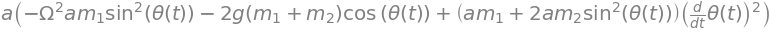

In [38]:
# Energy computation
E3=LM.Energy(L3,q3);
E3=E3.simplify();
E3=sp.collect(E3,-2*g*sp.cos(theta));
E3=sp.collect(E3,sp.diff(theta,t)**2);
E3

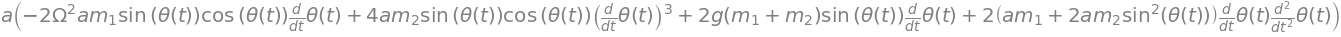

In [39]:
# Energy derivative
dE3dt=sp.diff(E3,t);
dE3dt

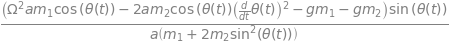

In [40]:
# Solving for d2thetadt2 from EOM3theta
d2thetadt2=sp.solve(EOM3theta,sp.diff(sp.diff(theta,t),t))[0];
d2thetadt2

In [41]:
# Substituting dthetadt^2 on the energy expression
sp.simplify(dE3dt.subs(sp.diff(sp.diff(theta,t),t),d2thetadt2))

In [42]:
# So the energy is conserved in this system

# d)

In [43]:
# Kinetic energy

# First particle
T3_1=LM.T(x3_1,0,0,1);

# Second particle
T3_2=LM.T(x3_2,0,0,1);

# Third particle
T3_3=LM.T(x3_3,0,0,2);

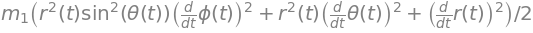

In [44]:
T3_1

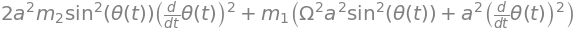

In [45]:
# Total kinetic energy with the problem's constraints (dphidt=omega, r=a)
T3=sp.simplify(T3_1+T3_2+T3_3);
T3=sp.simplify(T3.subs([(r,a),(sp.diff(phi,t),omega)]));
T3=sp.collect(T3,sp.sin(theta)**2);
T3

In [46]:
# Potential energy 

# First particle
U3_1=LM.U(x3_1,F3_1,0);

# Second particle
U3_2=LM.U(x3_2,F3_1,0);

# Third particle
U3_3=LM.U(x3_3,F3_2,0);

In [47]:
# Total potential energy 
U3=U3_1+U3_2+U3_3;
U3=U3.subs([(r,a)]);
U3=sp.collect(U3,-2*a*g*sp.cos(theta));
U3

In [48]:
# Checkin if the system's energy equals the sum of its potential and kinetic energies
E3==T3+U3

False

f is not homogeneous of degree 2


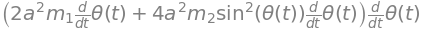

In [49]:
# Checkin if the kinetic is a homogeneous function of degree 2
LM.Hom_func_thrm (T3,q3,2)

# e)

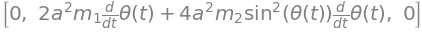

In [50]:
# Generalized momenta array
P3=LM.gen_p(L3,q3);
P3

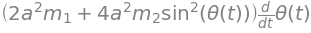

In [51]:
# Angular momentum 
ptheta=P3[1];
ptheta=sp.collect(ptheta,sp.diff(theta,t));
ptheta

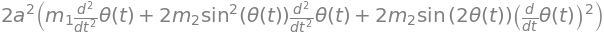

In [52]:
# Generalized force, using the EOM for theta to find d2thetadt2
Qtheta=LM.gen_Q(P3)[1];
#Qtheta=sp.simplify(Qtheta.subs(sp.diff(sp.diff(theta,t),t),d2thetadt2));
Qtheta

# f) Some attemps at simplifying the ODE (no apparent results)

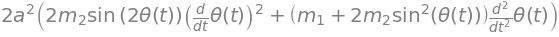

In [53]:
# Differentiating ptheta with respect to t 
dpthetadt=sp.simplify(sp.diff(ptheta,t));
dpthetadt=sp.collect(dpthetadt,sp.diff(sp.diff(theta,t),t));
dpthetadt

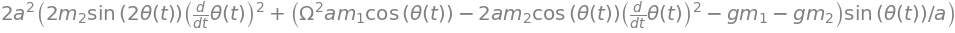

In [54]:
# If momentum is conserved, dpthetadt=0

# Substituting ddot(theta) in the momentum expression
dpthetadt=dpthetadt.subs(sp.diff(sp.diff(theta,t),t),d2thetadt2);
dpthetadt

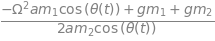

In [55]:
sol1=sp.solve (dpthetadt,sp.diff(theta,t)**2)[0];
sol1

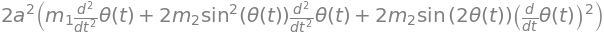

In [56]:
Qtheta

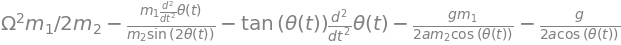

In [57]:
Sol1=sp.solve(EOM3theta,sp.diff(theta,t)**2)[0];
Sol1

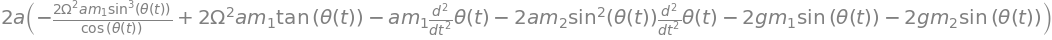

In [58]:
Sol2=sp.simplify(Qtheta.subs(sp.diff(theta,t)**2,Sol1));
Sol2

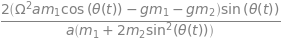

In [59]:
sp.solve(Sol2,sp.diff(sp.diff(theta,t),t))[0]

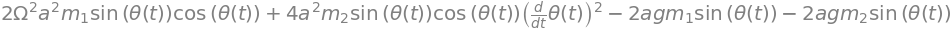

In [60]:
sp.diff(L3,theta)

# Problem 4

In [61]:
# Parameters
m1=LM.mass(1);
m2=LM.mass(2);
l=sp.Symbol("l");

# Generalized coordinates 
q4=LM.cylindrical("phi")[0];
r=q4[0];
phi=q4[1];
z=q4[2];

# Position vectors
x4_1=[r*sp.cos(phi),r*sp.sin(phi),0];
x4_2=[0,0,-z];

# External field vector
F4_1=[0,0,-m1*g];
F4_2=[0,0,-m2*g];


# Moment of inertia (for this problem, it overspecifies the system, so it is not used in the computation of the Lagrangian)
I1=m1*r**2;

# System array for the first particle
system4_1=[x4_1,1,F4_1,0,0,0];

# System array for the second particle
system4_2=[x4_2,2,F4_2,0,0,0];

# a)

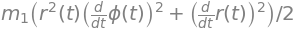

In [62]:
# Lagrangian for the first particle 
L4_1=LM.L(system4_1);
L4_1

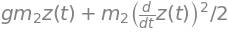

In [63]:
# Lagrangian for the second particle 
L4_2=LM.L(system4_2);
L4_2

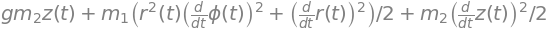

In [64]:
# Lagrangian for the whole system
L4=L4_1+L4_2;
L4

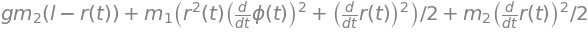

In [65]:
# However, there exists the constraint f=f(z,r)=z+r=l, yielding
L4=sp.simplify(L4.subs([(z,l-r)]));
L4

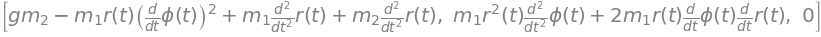

In [66]:
# Equations of motion
EOM4=LM.EOM(L4,q4,[],[]);
EOM4

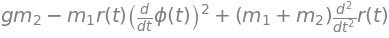

In [67]:
# EOM for r
EOM4r=EOM4[0]
EOM4r=sp.collect(EOM4r,sp.diff(sp.diff(r,t),t));
EOM4r

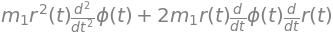

In [68]:
# EOM for phi
EOM4phi=EOM4[1]
EOM4phi

# b)

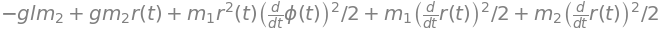

In [69]:
# Energy function computation
E4=sp.simplify(LM.Energy(L4,q4));
E4

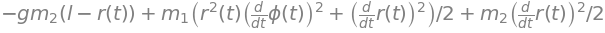

In [70]:
# Energy computation
Ener4=LM.T(x4_1,0,0,1)+LM.T(x4_2,0,0,2)+LM.U(x4_1,F4_1,0)+LM.U(x4_2,F4_2,0);
Ener4=sp.simplify(Ener4.subs(z,l-r));
Ener4

In [71]:
# For this case, the energy function is equal to the total energy

In [72]:
# Solving for the second time derivatives of the generalized coordinates
d2rdt2=sp.solve(EOM4r,sp.diff(sp.diff(r,t),t))[0];
d2phidt2=sp.solve(EOM4phi,sp.diff(sp.diff(phi,t),t))[0];

# Conservation of energy
dE4dt=sp.diff(E4,t);
sp.simplify(dE4dt.subs([(sp.diff(sp.diff(r,t),t),d2rdt2),(sp.diff(sp.diff(phi,t),t),d2phidt2)]))

In [73]:
#Energy is conserved

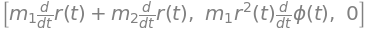

In [74]:
# Generalized momenta array
P=LM.gen_p(L4,q4);
P

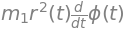

In [75]:
# Angular momentum
pphi=P[1];
pphi

In [76]:
# Conservation of angular momentum
dpphidt=sp.diff(pphi,t);
dpphidt.subs([(sp.diff(sp.diff(phi,t),t),d2phidt2)])

In [77]:
# So angular momentum is conserved

# c)

In [78]:
# The particle with mass m1 will undergo uniform circular motion when the radius remains constant, i.e dr/dt=0

# Let r0 be the constant radius of the circular orbit
r_0=sp.Symbol("r_0");

# Equation of motion for the circular orbit
circ=sp.simplify(EOM4r.subs(r,r_0));

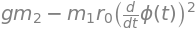

In [79]:
circ

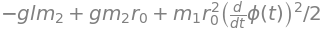

In [80]:
# Finding the orbit's energy
E_circ=sp.simplify(E4.subs(r,r_0));
E_circ

# d)

In [81]:
# This is shown explicitly in the pdf document